# <center> Sales prediction</center>
---


Imports

In [178]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_theme(style="whitegrid")

Loading datasets

In [179]:
# Getting urls from drive
test_url='https://drive.google.com/file/d/1voPMZ-66QbUHHO6XR53TCan6emWFPfBB/view?usp=sharing'
test_url2='https://drive.google.com/uc?id=' + test_url.split('/')[-2]

shops_url = 'https://drive.google.com/file/d/1L_vHYXH_JPqB5cwvDD0tyb7XBSLYy_IZ/view?usp=sharing'
shops_url2='https://drive.google.com/uc?id=' + shops_url.split('/')[-2]

train_url = 'https://drive.google.com/file/d/1yIpuw-YaV2i0zq86hFjoe_xnv33dNH6e/view?usp=sharing'
train_url2='https://drive.google.com/uc?id=' + train_url.split('/')[-2]

items = 'https://drive.google.com/file/d/1VgEsLxOJoa7LK8VWkCFmvbwVtDo1awPg/view?usp=sharing'
items2='https://drive.google.com/uc?id=' + items.split('/')[-2]

item_categories_url = 'https://drive.google.com/file/d/10d0c83jQBp3IlW6inlH6IkiUKV4wEf3_/view?usp=sharing'
item_categories_url2='https://drive.google.com/uc?id=' + item_categories_url.split('/')[-2]

# Reading csv files
test = pd.read_csv(test_url2)
train = pd.read_csv(train_url2)
shops = pd.read_csv(shops_url2)
items = pd.read_csv(items2)
item_categories = pd.read_csv(item_categories_url2)

In [180]:
dfs = {'Test': test, 'Train': train, 'Shops': shops, 'Items': items, 'Item_Categories': item_categories} # Dict of dataframes

## <center> Datasets analysis: <center>

### Basic information:
- NaN values
- Types
- Unique values

In [181]:
for k, v in dfs.items():
    print(k)
    display(v.head(5))

Test


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


Train


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Shops


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Items


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Item_Categories


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Checking NaN values

In [182]:
for k, v in dfs.items():
    print('\n', k)
    display(v.isnull().sum())


 Test


ID         0
shop_id    0
item_id    0
dtype: int64


 Train


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


 Shops


shop_name    0
shop_id      0
dtype: int64


 Items


item_name           0
item_id             0
item_category_id    0
dtype: int64


 Item_Categories


item_category_name    0
item_category_id      0
dtype: int64

Checking data types

In [183]:
for k, v in dfs.items():
    print('\n', k)
    dtypes = v.dtypes
    display(dtypes)


 Test


ID         int64
shop_id    int64
item_id    int64
dtype: object


 Train


date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


 Shops


shop_name    object
shop_id       int64
dtype: object


 Items


item_name           object
item_id              int64
item_category_id     int64
dtype: object


 Item_Categories


item_category_name    object
item_category_id       int64
dtype: object

Unique values:

In [184]:
for k, v in dfs.items():
    print('\n', k)
    display(v.nunique())


 Test


ID         214200
shop_id        42
item_id      5100
dtype: int64


 Train


date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64


 Shops


shop_name    60
shop_id      60
dtype: int64


 Items


item_name           22170
item_id             22170
item_category_id       84
dtype: int64


 Item_Categories


item_category_name    84
item_category_id      84
dtype: int64

### Merging datasets:

These datasets contain all the information in separated tables. Let's merge them and create new complex dataset

In [185]:
train_items = pd.merge(train, items, how='inner', on='item_id')
train_complete1 = pd.merge(train_items, item_categories, how='inner', on='item_category_id')
train_complete = train_complete1.drop(columns=['item_name', 'item_category_name']) # All merged in this variable

display(train_complete)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37
...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,36
2935845,21.09.2015,32,55,13091,1000.0,1.0,36
2935846,16.09.2015,32,55,13094,2500.0,1.0,36
2935847,22.09.2015,32,55,13094,2500.0,2.0,36


### Dataset visualization

In [186]:
train_complete['date'] = pd.to_datetime(train_complete['date']) # Change date column to pandas date time
train_complete

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-02-01,0,59,22154,999.0,1.0,37
1,2013-01-23,0,24,22154,999.0,1.0,37
2,2013-01-20,0,27,22154,999.0,1.0,37
3,2013-02-01,0,25,22154,999.0,1.0,37
4,2013-03-01,0,25,22154,999.0,1.0,37
...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,13093,250.0,1.0,36
2935845,2015-09-21,32,55,13091,1000.0,1.0,36
2935846,2015-09-16,32,55,13094,2500.0,1.0,36
2935847,2015-09-22,32,55,13094,2500.0,2.0,36


#### Shop total items sold

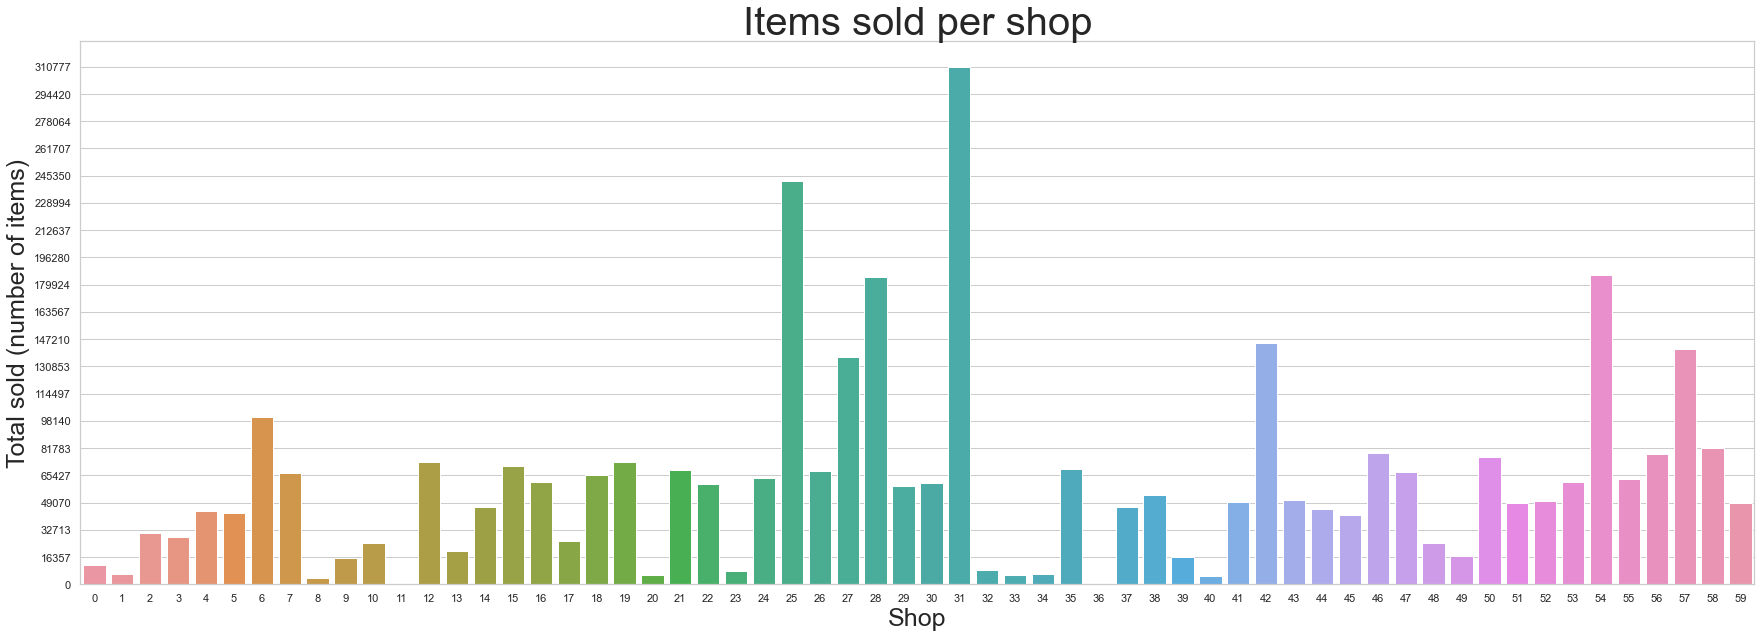

In [187]:
shop_total_sold = train_complete.groupby('shop_id', as_index=False).agg({'item_cnt_day': 'sum'})

fig, ax = plt.subplots(figsize = (30, 10))

ax = sns.barplot(
    data = shop_total_sold,
    x = 'shop_id',
    y = 'item_cnt_day')

ax.set_xlabel('Shop', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per shop', fontsize = 40)
ax.set_yticks(np.linspace(0, shop_total_sold['item_cnt_day'].max(), 20))

plt.show()
plt.close()

#### Sales per year and month

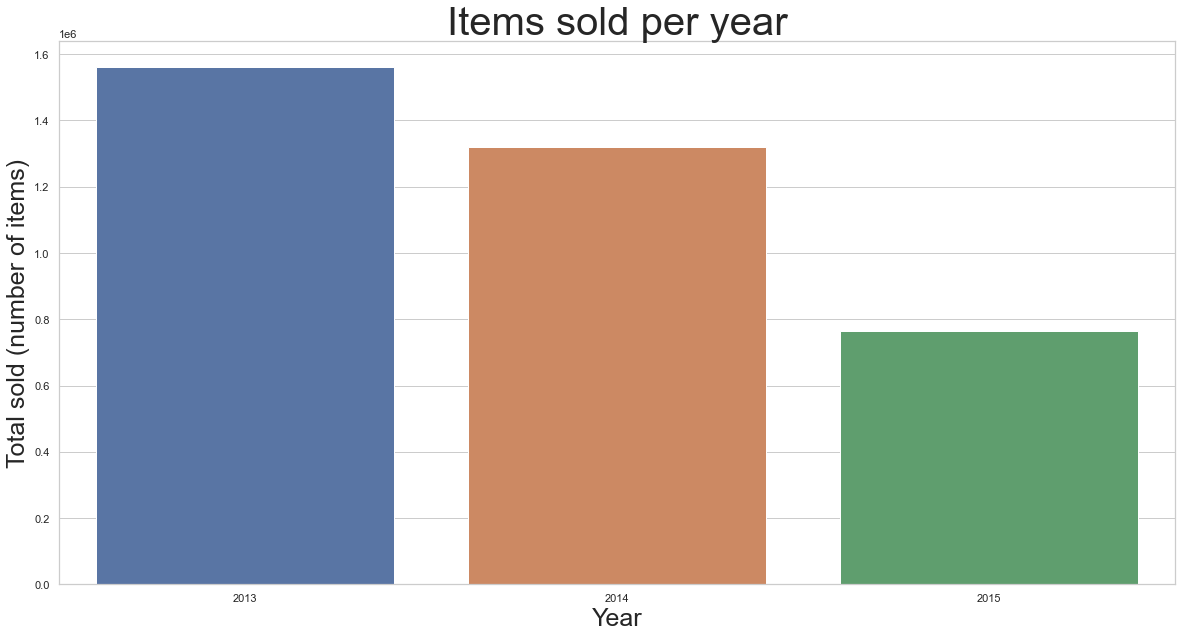

In [188]:
sells_year = train_complete.groupby(train_complete['date'].dt.year).agg({'item_cnt_day': 'sum'}).reset_index()

fig, ax = plt.subplots(figsize = (20, 10))

ax = sns.barplot(
    data = sells_year,
    x = 'date',
    y = 'item_cnt_day'
)

ax.set_xlabel('Year', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per year', fontsize = 40)

plt.show()
plt.close()

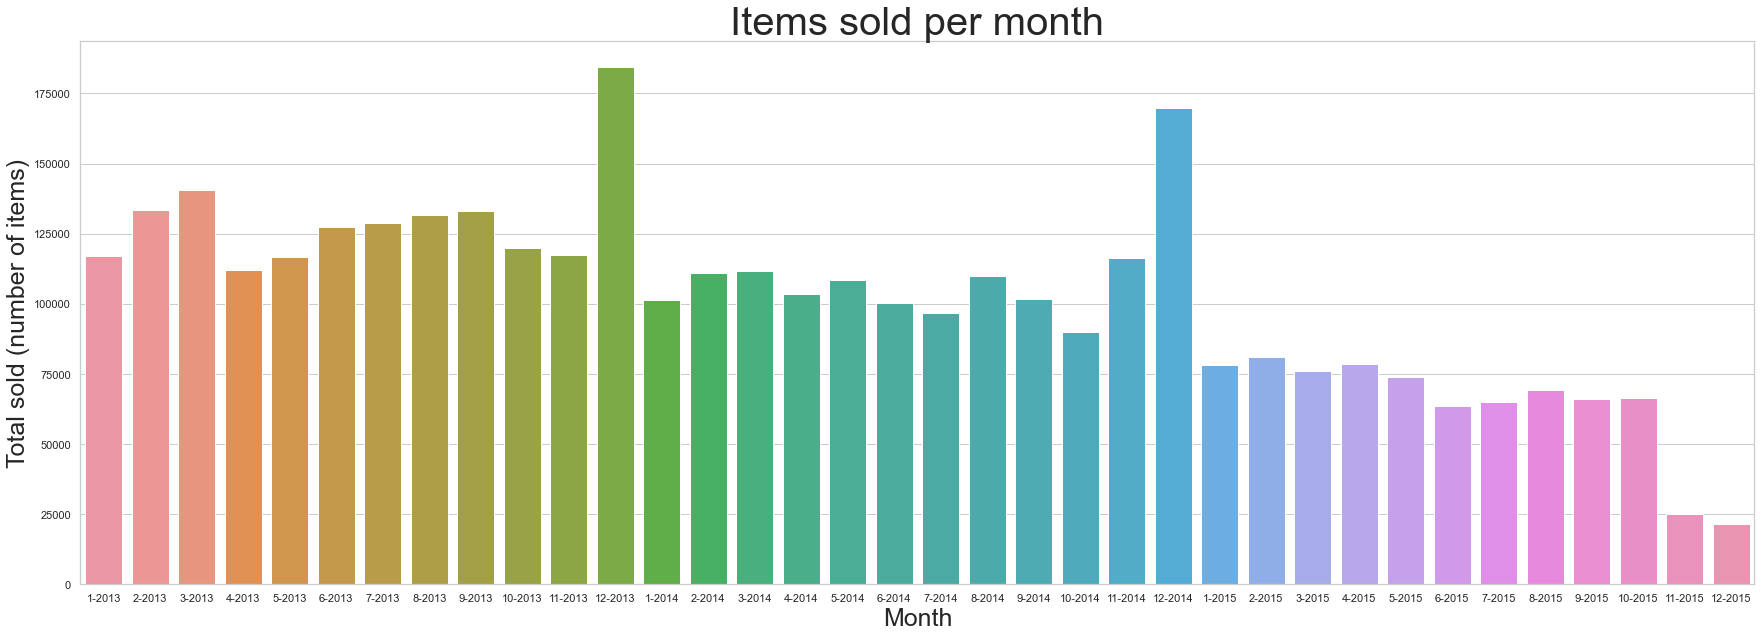

In [189]:
sells_month = train_complete.groupby([train_complete.date.dt.year.rename('year'), train_complete.date.dt.month.rename('month')]).agg({'item_cnt_day': 'sum'}).reset_index()

sells_month['date'] = sells_month['month'].astype(str) + '-' +  sells_month['year'].astype(str)
sells_month = sells_month.drop(['month', 'year'], axis = 1)

fig, ax = plt.subplots(figsize = (30, 10))

ax = sns.barplot(
    data = sells_month,
    x = 'date',
    y = 'item_cnt_day'
)

ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per month', fontsize = 40)

plt.show()
plt.close()

#### Amount of items sold per shop by month and year

In [190]:
#By month
items_sold_month = train_complete.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_day': 'sum'}).reset_index()
display(items_sold_month)

,date_block_num,shop_id,item_cnt_day
0,0,0,5578.0
1,0,1,2947.0
2,0,2,1146.0
3,0,3,767.0
4,0,4,2114.0
...,...,...,...
1581,33,55,1972.0
1582,33,56,1263.0
1583,33,57,2316.0
1584,33,58,1446.0


,date,shop_id,item_cnt_day
0,2013,0,11705.0
1,2013,1,6311.0
2,2013,2,9961.0
3,2013,3,10199.0
4,2013,4,19002.0
...,...,...,...
154,2015,55,31670.0
155,2015,56,15198.0
156,2015,57,28218.0
157,2015,58,18072.0


Text(0.5, 1.0, 'Items sold per month')

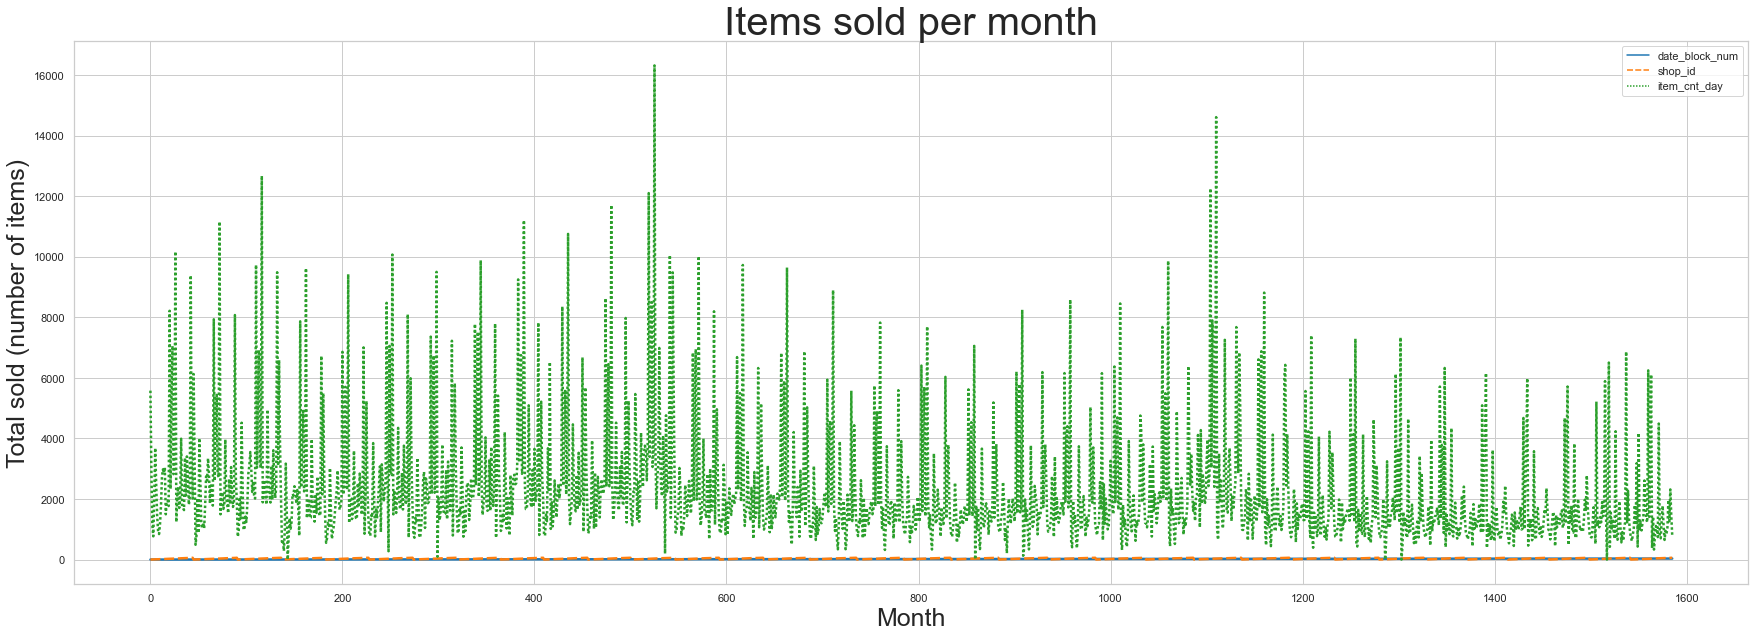

In [192]:
#By year
items_sold_year = train_complete.groupby([train_complete['date'].dt.year, 'shop_id']).agg({'item_cnt_day': 'sum'}).reset_index()
display(items_sold_year)

fig, ax = plt.subplots(figsize = (30, 10))

sns.lineplot(
    data=items_sold_month, 
    palette="tab10", 
    linewidth=2.5)

ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel('Total sold (number of items)', fontsize=25)
ax.set_title('Items sold per month', fontsize = 40)